# End-to-end `scivision` pipeline for a pretrained/prebuilt model for plankton classification

This notebook demonstrates `scivision` to load a pretrained `ResNet50` model suited to predict plankton species from images captured by the Plankton Imager system.
Further details of the challenge can be found in [the original model repository](https://github.com/alan-turing-institute/plankton-dsg-challenge).

The plugin repository of the the pretrained `ResNet50` model is available at:
https://github.com/alan-turing-institute/plankton-cefas-scivision

## Install libraries

In [1]:
!pip -q install scivision

## Load libraries

In [2]:
from scivision.catalog import default_catalog
from scivision.io import load_dataset, load_pretrained_model

## Query

Let's explore which datasets are available to use with the ResNet-50 CEFAS plankton model which is named in the scivision catalog as `resnet50-plantkton`. We use `compatible_datasources` to query compatible datasources from the `scivision` data catalog. 

In [3]:
model_name = 'resnet50-plantkton'

In [4]:
compatible_datasources = default_catalog.compatible_datasources(model_name).to_dataframe()

This returns a `pandas.dataframe` with the number of potential datasets to pair the model with.

In [5]:
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
2,data-002,None,"(TaskEnum.classificiation,)","(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,True,"(CEFAS,)","(help-needed, 2D)"
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"


## Model

The following lines will look for the model URL (in this case the GitHub repository) from scivision catalog. After, the `load_pretrained_model` function recognises the model URL and install dependencies.

In [6]:
models = default_catalog.models.to_dataframe()
targetmodel = models[models.name == model_name].url.item()
model = load_pretrained_model(targetmodel, allow_install=True)

Let's explore the configurations (source, expected input and outputs) of the loaded model.

In [7]:
model

scivision.PretrainedModel( 
  module='resnet50_cefas', 
  model='resnet50', 
  source='https://github.com/alan-turing-institute/plankton-cefas-scivision' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

## Data

Once the model is loaded, we need to load the paired dataset. In this case, we will use the dataset named `data-004`, which is a sample dataset kindly prepared by CEFAS to experiment with the ResNet50 model.

In [8]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-004']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"


In [9]:
cat = load_dataset(target_datasource.url.item()) 
dataset = cat.plankton().to_dask()

## Prediction and visualisation

Possibly corrupted field Model in Image IFD
Possibly corrupted field GPSLongitudeRef in GPS IFD
Possibly corrupted field GPSLongitudeRef in GPS IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field GPSLongitudeRef in GPS IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field GPSLongitudeRef in GPS IFD
Possibly corrupted field GPSLongitudeRef in GPS IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field Model in Image IFD
Possibly corrupted field GPSLongitudeRef in GPS IFD
Possibly corrupted field Model in Image IFD


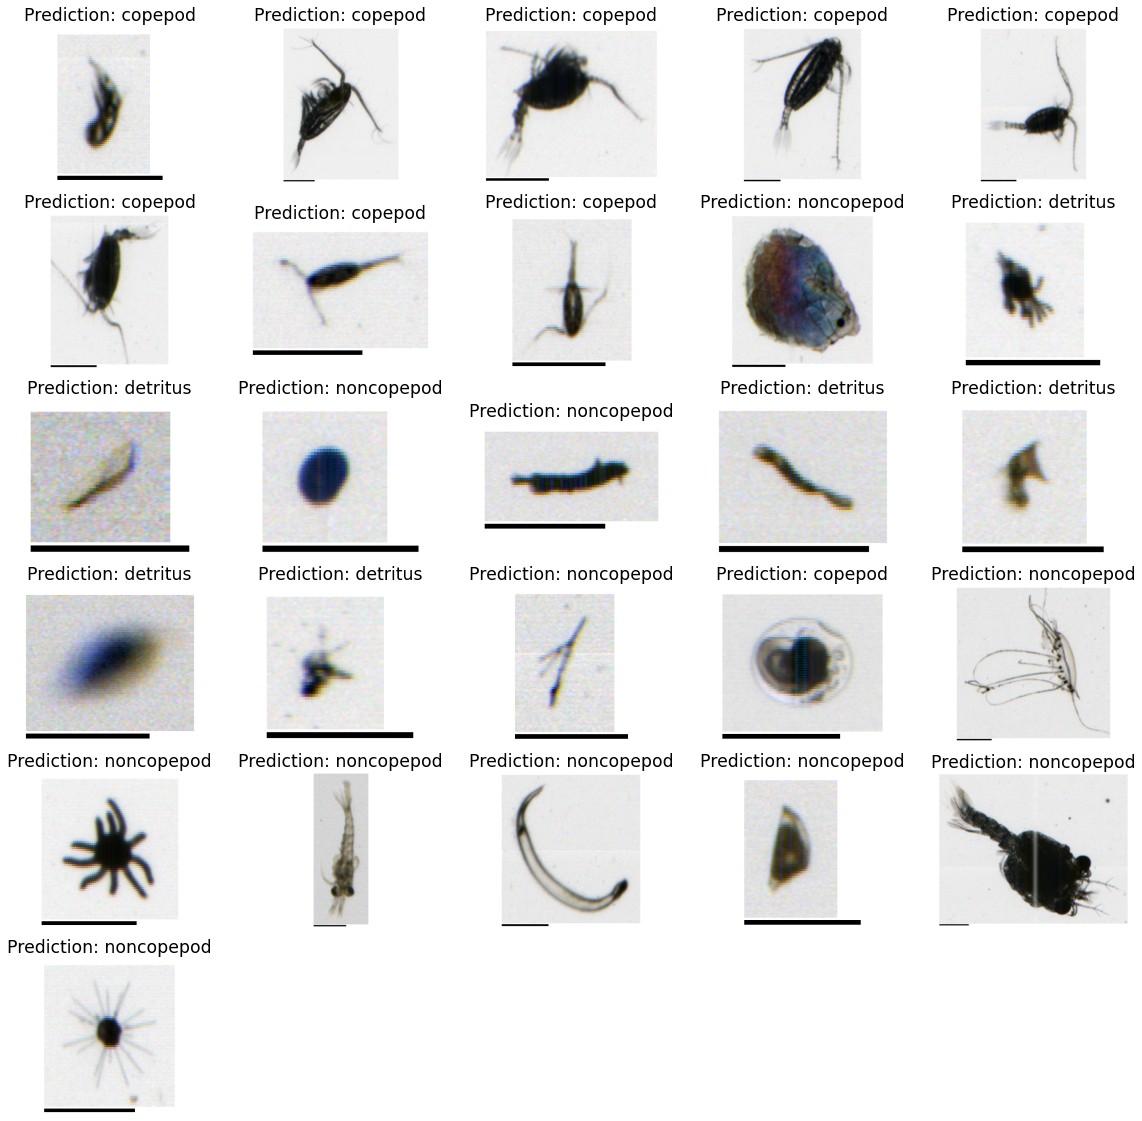

In [10]:
y = model.predict(dataset, batch_size=15)